## **Naive Bayes Algorithm:**
**A Brief Overview**

Naive Bayes is a probabilistic machine learning algorithm used for classification tasks. It’s widely employed in various applications, including spam filtering, document classification, and sentiment prediction1. The name “naive” comes from the assumption that features used in the model are independent of each other. In other words, changing the value of one feature doesn’t directly influence the value of any other features used in the algorithm.

**Key Concepts:**

Conditional Probability: Before we delve into Naive Bayes, let’s understand conditional probability.

Consider these examples:

**Coin Toss and Fair Dice:** When you flip a fair coin, the probability of getting heads or tails is equal (50%). Similarly, when rolling a fair 6-faced dice, the probability of getting a 1 is 1/6 (approximately 0.166).


Playing Cards Example: If you pick a card from a deck, what’s the probability of getting a queen given that the card is a spade? Conditional probability helps us answer such questions.

**Bayes Rule:** The Naive Bayes algorithm is based on Bayes’ Theorem. It allows us to update our beliefs about an event based on new evidence. The formula for Bayes’ Theorem is:

P(A∣B)=P(B∣A)*P(A)​/P(B)

(P(A|B)): Probability of event A given evidence B.
(P(B|A)): Probability of evidence B given event A.
(P(A)): Prior probability of event A.
(P(B)): Prior probability of evidence B.

**Gaussian Naive Bayes:** A variant of Naive Bayes that assumes features follow a Gaussian (normal) distribution. It’s commonly used for continuous data.
- GNB is suitable for continuous features.
- It assumes that the features follow a normal (Gaussian) distribution

**Multinomial Naive Bayes:**
- MNB is commonly used for text classification tasks where we deal with discrete data like word counts in documents.
- It assumes that the features represent discrete frequencies or counts of events.

# **The goal is to predict the species based on these features.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.duplicated().sum()

np.int64(0)

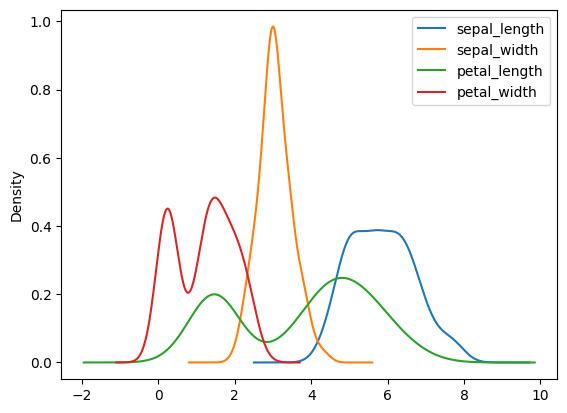

In [ ]:
df1.plot(kind='density')
plt.show()

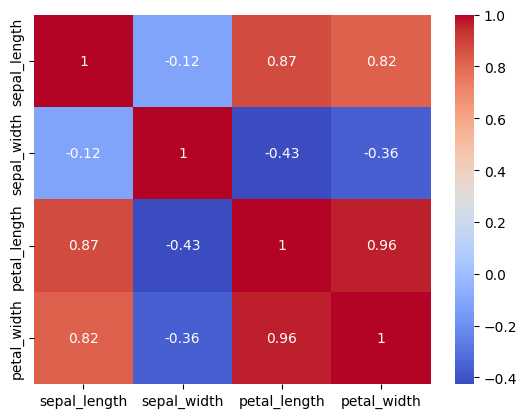

In [ ]:
corr = df1.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df1['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [ ]:
x = df1.drop('species', axis=1)
y = df1['species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
from sklearn. metrics import accuracy_score, classification_report

Accuracy = accuracy_score(y_test, y_pred)
Classification_report = classification_report(y_test, y_pred)

print(Accuracy)
print(Classification_report)

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
df1.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
new_data = [[5.2, 3.6, 1.5, 0.4]]


prediction = model.predict(new_data)
prediction

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


np.str_('setosa')

### **Conclusion**
The Gaussian Naive Bayes classifier, when properly implemented, can achieve an accuracy of around 96-98% on the Iris dataset